In [355]:
import numpy as np
import pandas as pd
from collections import Counter
import re
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

In [356]:
# зафиксируем параметры и версию пакетов, чтобы эксперименты были воспроизводимы
RANDOM_SEED = 42
!pip freeze > requirements.txt

## План работы
* Загрузка данных и знакомство
* Изучаем данные в целом
* Изучаем каждую фичу на пропуски, чистим, вытаскиваем нужные признаки, сохраняем
* Определяем основные фичи, остальное удаляем
* Подготавливаем датасет для модели
* Скормливаем и смотрим метрики
* Выявляем наиболее влияющие признаки и при необходимости улучшаем модель


In [357]:
# Импортируем данные и сложим в список, чтобы удобнее их была анализировать при необходимости
df_train = pd.read_csv(r'C:\Users\user\Desktop\RF_project\data\main_task.csv')
df_test = pd.read_csv(r'C:\Users\user\Desktop\RF_project\data\kaggle_task.csv')
sample_submission = pd.read_csv(r'C:\Users\user\Desktop\RF_project\data\sample_submission.csv')
data_list = [df_train, df_test, sample_submission]
for data in data_list:
	display(data.head(5))
	display(data.info())
	display(data.describe())

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

,Ranking,Rating,Number of Reviews
count,40000.000000,40000.000000,37457.000000
mean,3676.028525,3.993037,124.825480
std,3708.749567,0.668417,295.666352
min,1.000000,1.000000,2.000000
25%,973.000000,3.500000,9.000000
50%,2285.000000,4.000000,33.000000
75%,5260.000000,4.500000,115.000000
max,16444.000000,5.000000,9660.000000


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


None

,Ranking,Number of Reviews
count,10000.000000,9343.000000
mean,3618.023500,123.050840
std,3665.076451,287.819368
min,2.000000,2.000000
25%,966.000000,9.000000
50%,2257.000000,32.000000
75%,5137.000000,114.000000
max,16443.000000,6437.000000


,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


None

,Rating
count,10000.000000
mean,3.002600
std,1.287579
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Основные фичи - это:
* City: Город
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com'
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [358]:
# в тестовой выборке нет рейтинга, этого и нужно нам предсказать - целевая переменная! Всего 8 фичей, посмотрим, все ли они будут нам полезны
# для корректной обработки всех признаков объеденим два дата сета, но с пометками
df_test['sample'] = 0
df_train['sample'] = 1
df_test['Rating'] = 0 # в тесте нет Rating, поэтому пока проставим нулями
data = df_test.append(df_train, sort=False).reset_index(drop=True)


# 1. Изучение данных, выявление NaN и обработка
* пробегаемся по каждой фиче, смотрим, чистим

Text(0.5, 1.0, 'Диаграмма 1 Пропущенные значения по фичам')

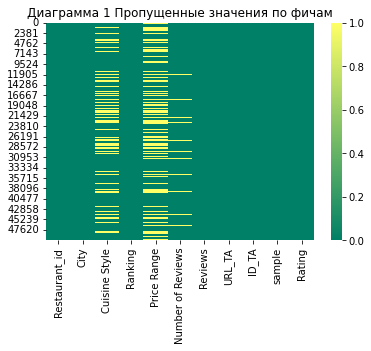

In [359]:
# как дела у нас в целом
sns.heatmap(data.isnull(), cmap = 'summer')
plt.title('Диаграмма 1 Пропущенные значения по фичам')

Основные пропуски у нас по 'Cuisine Style', 'Price Range', 'Number of Reviews' и 'Reviews'

In [360]:
# Пробежимся по числам
print("Количество пропусков\n", data.isna().sum())
print("Количество уникальных значений\n", data.nunique())
print("Количество уникальных значений в тестовой выборке\n", df_test.nunique())

Количество пропусков
 Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64
Количество уникальных значений
 Restaurant_id        13094
City                    31
Cuisine Style        10731
Ranking              12975
Price Range              3
Number of Reviews     1573
Reviews              41857
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64
Количество уникальных значений в тестовой выборке
 Restaurant_id        10000
City                    31
Cuisine Style         3128
Ranking               5914
Price Range              3
Number of Reviews      868
Reviews               8358
URL_TA               10000
ID_TA                10000
sample                   1
Ratin

## Проанализируем каждую фичу отдельно

1. Restaurant_id

Начнем с Restaurant_id Пропусков нет. 13094 уникальных значений для 50000 строк тренировочной выборки. В тестовой выборке все значения уникальны.

In [361]:
data.Restaurant_id.value_counts()

id_227      19
id_633      19
id_436      19
id_871      19
id_585      18
            ..
id_14655     1
id_14405     1
id_15809     1
id_14855     1
id_11658     1
Name: Restaurant_id, Length: 13094, dtype: int64

In [362]:
data[data['Rating'] ==0]['Restaurant_id'].value_counts() # здесь все уникальные значения, значит проблема в трайне

id_0       1
id_6670    1
id_6663    1
id_6664    1
id_6665    1
          ..
id_3333    1
id_3334    1
id_3335    1
id_3336    1
id_9999    1
Name: Restaurant_id, Length: 10000, dtype: int64

In [363]:
# Посмотрим как они выглядят
data[data['Restaurant_id'] == 'id_585']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
585,id_585,Paris,NaN,10563.0,NaN,5.0,"[[], []]",/Restaurant_Review-g187147-d12411515-Reviews-P...,d12411515,0,0.0
12887,id_585,Amsterdam,"['American', 'Bar', 'Pub', 'Barbecue']",586.0,$$ - $$$,116.0,[['Great wings and ribs - but not your usual.....,/Restaurant_Review-g188590-d7799470-Reviews-Sm...,d7799470,1,4.0
15557,id_585,Lyon,"['French', 'Bar', 'European', 'Vegetarian Frie...",586.0,$$ - $$$,268.0,"[['Nice lunch', 'Great value menu and very tas...",/Restaurant_Review-g187265-d4093687-Reviews-Le...,d4093687,1,4.0
15893,id_585,Oslo,['Vietnamese'],586.0,$$ - $$$,16.0,[['Intimate restaurant with excellent food (l....,/Restaurant_Review-g190479-d8707508-Reviews-Oe...,d8707508,1,4.0
19084,id_585,Munich,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",591.0,$$ - $$$,78.0,"[['Lovely italian', 'Terrific food, authentic ...",/Restaurant_Review-g187309-d2043121-Reviews-Il...,d2043121,1,4.0
23168,id_585,Edinburgh,"['Bar', 'Pizza', 'British', 'Vegetarian Friend...",586.0,$$ - $$$,306.0,"[['Buckstone Regulars Christmas Lunch', 'Very ...",/Restaurant_Review-g186525-d1127301-Reviews-Ch...,d1127301,1,4.0
25868,id_585,Stockholm,"['Seafood', 'Swedish']",586.0,$$$$,85.0,"[['Very disappointed...', 'Great place!'], ['1...",/Restaurant_Review-g189852-d2072805-Reviews-Oy...,d2072805,1,4.0
29493,id_585,London,"['Italian', 'Mediterranean', 'European', 'Vege...",586.0,$$ - $$$,820.0,"[['DINNER', 'Good decent food.'], ['12/13/2017...",/Restaurant_Review-g186338-d1389702-Reviews-Ol...,d1389702,1,4.0
30131,id_585,Vienna,NaN,586.0,NaN,30.0,"[['Unique experience', 'All inclusive experien...",/Restaurant_Review-g190454-d1857535-Reviews-Vi...,d1857535,1,5.0
30311,id_585,Warsaw,"['Chinese', 'Asian', 'Vegetarian Friendly']",586.0,$$$$,24.0,"[['A chinese feast', 'High End Spicy Chinese']...",/Restaurant_Review-g274856-d12187950-Reviews-P...,d12187950,1,4.0


Это может быть сетевые рестораны, но предлагаемые кухни и цены сильно отличаются, тем не менее id совпадает с Ranking, поэтому переведем этот признак в численный формат и посмотрим корреляцию

In [364]:
data['Int_res_id'] = data['Restaurant_id'].apply(lambda x: int(x[3:]))
data[['Int_res_id', 'Ranking']].corr()

,Int_res_id,Ranking
Int_res_id,1.00000,0.82509
Ranking,0.82509,1.00000


In [365]:
print("Корреляция в сете трайн\n", data[data['Rating'] ==1][['Int_res_id', 'Ranking']].corr())
print("Корреляция в сете тест\n", data[data['Rating'] ==0][['Int_res_id', 'Ranking']].corr())

Корреляция в сете трайн
             Int_res_id   Ranking
Int_res_id    1.000000  0.999999
Ranking       0.999999  1.000000
Корреляция в сете тест
             Int_res_id   Ranking
Int_res_id    1.000000 -0.001706
Ranking      -0.001706  1.000000


Создадим новый признак chain: 1 - сетевой, 0 - несетевой.

In [366]:
chain_lst = list(data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index)

In [367]:
data['chain'] = data[data.Restaurant_id.isin(chain_lst)].Restaurant_id.apply(lambda x: 1)
data['chain'].fillna(0, inplace=True)
data['chain'].value_counts(normalize=True)

1.0    0.92386
0.0    0.07614
Name: chain, dtype: float64

Кажется, что более 92% всех ресторанов - сетевые

2. City

Text(0.5, 1.0, 'Диаграмма 2 Распределение ресторанов по городам')

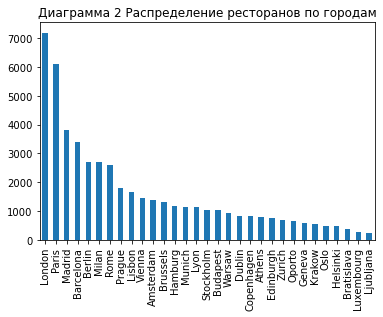

In [368]:
# Посмотрим какие города чаще встречаются
cities = data.City.value_counts(ascending=False).plot(kind = 'bar')
plt.title('Диаграмма 2 Распределение ресторанов по городам')

Предположения о том, что количество городов зависит от численности населения и ресторанов скорее всего неверное, вместе с тем, мы видим столицы, где больше всего бывают туристы,
которые и склонны писать отзывы и читать их, создадим переменную, как количество упомянутых ресторанов на каждый город, даже если не написали отзыв


In [369]:
city_count_dict = dict(data['City'].value_counts()) # словарь с количеством ресторанов по городам
data['main_rest_in_city'] = data.City.map(city_count_dict)
print(city_count_dict)

{'London': 7193, 'Paris': 6108, 'Madrid': 3813, 'Barcelona': 3395, 'Berlin': 2705, 'Milan': 2694, 'Rome': 2589, 'Prague': 1816, 'Lisbon': 1647, 'Vienna': 1443, 'Amsterdam': 1372, 'Brussels': 1314, 'Hamburg': 1186, 'Munich': 1145, 'Lyon': 1126, 'Stockholm': 1033, 'Budapest': 1021, 'Warsaw': 925, 'Dublin': 836, 'Copenhagen': 819, 'Athens': 776, 'Edinburgh': 745, 'Zurich': 685, 'Oporto': 642, 'Geneva': 590, 'Krakow': 554, 'Oslo': 488, 'Helsinki': 475, 'Bratislava': 380, 'Luxembourg': 263, 'Ljubljana': 222}


Text(0.5, 1.0, 'Диаграмма 3 Распределение рейтингов по городам')

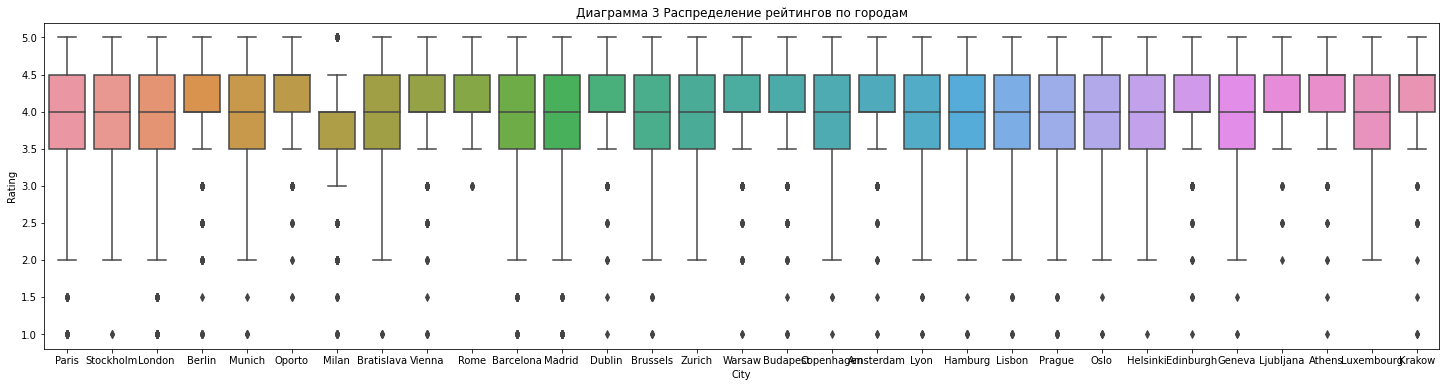

In [370]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='City', y='Rating', data=data[data['sample']==1]) # смотрим тренировочные данные
plt.title('Диаграмма 3 Распределение рейтингов по городам')


Из графика понятно, что в Милане мало ресторанов с высоким рейтингом, но в целом средние значения по столицам похожи

3. Cuisine Style

In [371]:
# Посмотрим на данную и фичу, постараемся обработать
data['Cuisine Style'][1]

"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

In [372]:
# как видно из диаграмма 1, по данной фиче много пропущенных значений, обработаем их, заполнив значениям Others, одновременно сохранив колонку с NanA
data['Cuisine Style_Nan'] = data['Cuisine Style'].isna().astype('uint8')
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Others']")



In [373]:
# как часто встречаются разные кухни? для этого распознаем текст и вытащим в отдельные столбец название кухонь
data['Cuisine Style List'] = data['Cuisine Style'].str.findall(r"'(\b.*?\b)'")
data['Cuisine Style List'].head(15)



0                                            [Bar, Pub]
1     [European, Scandinavian, Gluten Free Options, ...
2                                 [Vegetarian Friendly]
3     [Italian, Mediterranean, European, Vegetarian ...
4     [Italian, Mediterranean, European, Seafood, Ve...
5                             [French, Cafe, Fast Food]
6                                [European, Portuguese]
7                                              [Others]
8                              [European, Scandinavian]
9                                             [Italian]
10                                             [Others]
11                                            [Italian]
12                                              [Greek]
13                                             [Others]
14    [European, Czech, Eastern European, Central Eu...
Name: Cuisine Style List, dtype: object

Text(0.5, 1.0, 'Диаграмма 4 Количество кухонь')

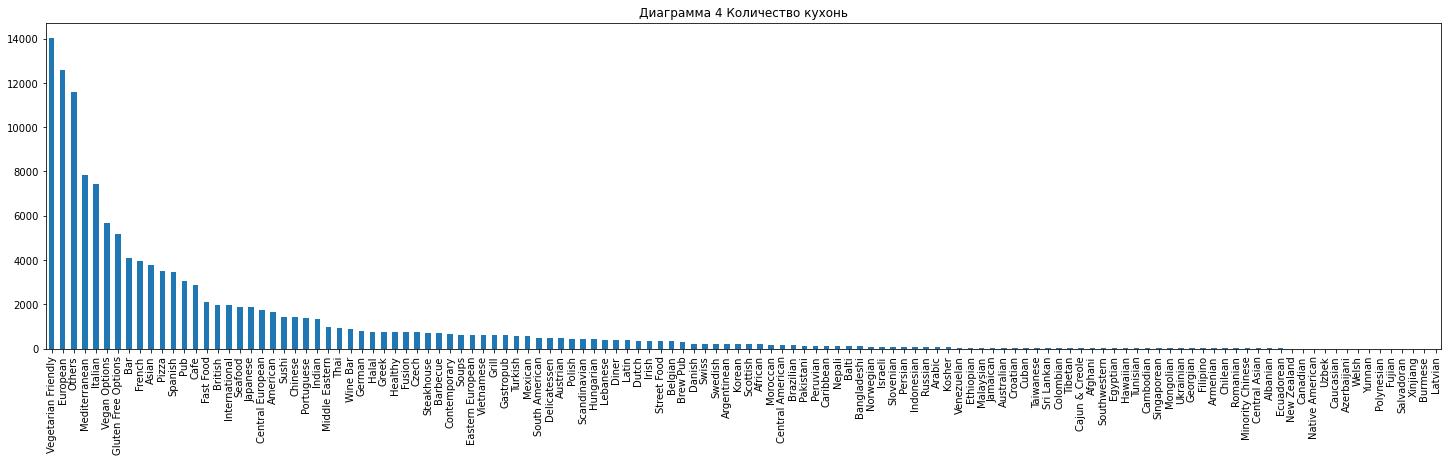

In [374]:
plt.figure(figsize=(25,6))
c = Counter()
for line in data['Cuisine Style List']:
    for cuisine_style in line:
        c[cuisine_style] += 1
cuisine_styles = pd.Series(c)
cuisine_styles.sort_values(ascending=False).plot(kind = 'bar')
plt.title('Диаграмма 4 Количество кухонь')

Вывод - наиболее встречаемые кухни - вегетарианские и европейские

4. Ranking - пропусков нет

Text(0.5, 1.0, 'Диаграмма 5 Распределение признака')

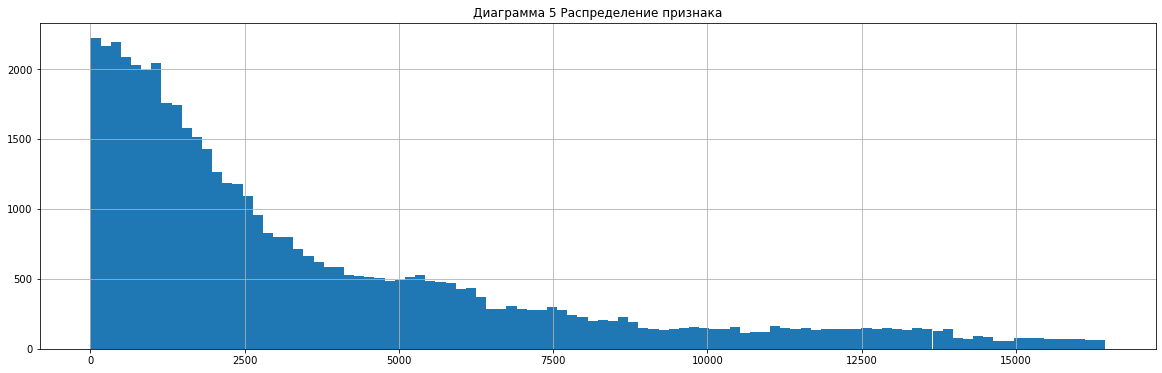

In [375]:
# визуализируем, может будет что полезное
plt.rcParams['figure.figsize'] = (20,6)
data['Ranking'].hist(bins=100)
plt.title('Диаграмма 5 Распределение признака')

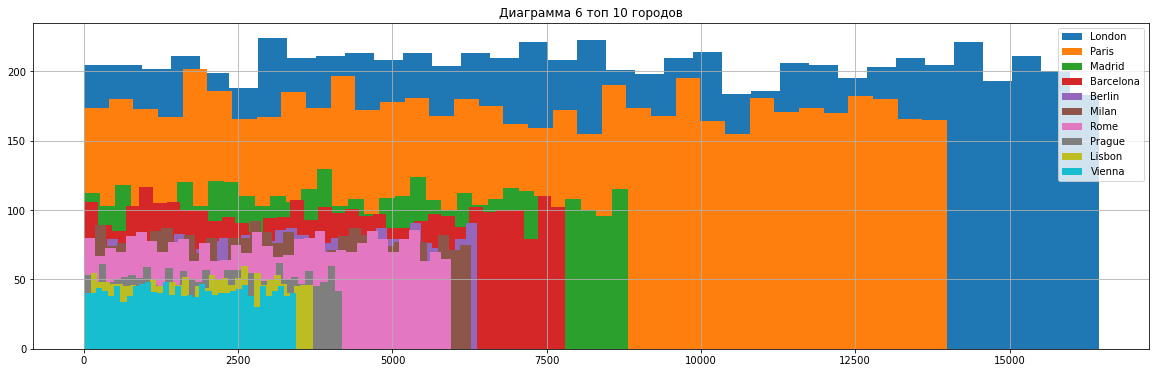

In [376]:
# Посмотрим на 10 главных городов
for x in (data['City'].value_counts())[0:10].index:
	data['Ranking'][data['City'] == x].hist(bins=35, label = x)
	plt.legend(prop ={'size': 10})
	plt.title('Диаграмма 6 топ 10 городов')

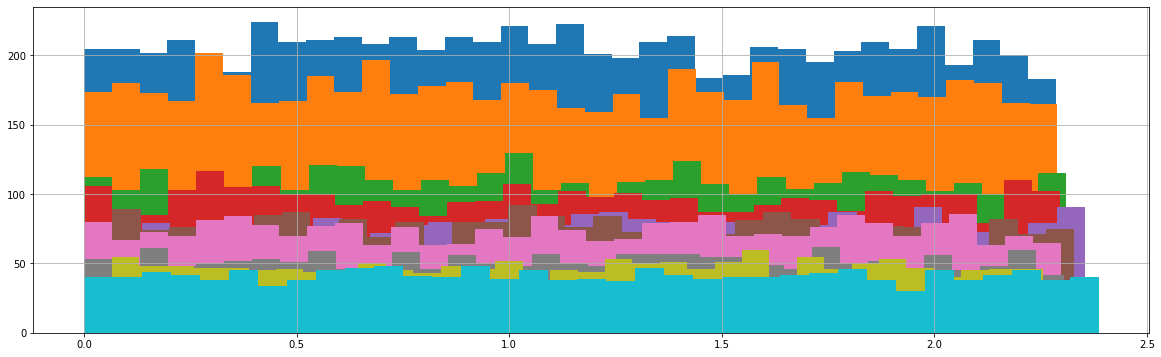

In [377]:
data['Relative Ranking'] = data['Ranking']/data['main_rest_in_city']
for x in (data['City'].value_counts())[0:10].index:
    data['Relative Ranking'][data['City'] == x].hist(bins=35, label = x)
	

Относительный ranking не выявил ничего не обычного

5. Price Range
	
Большое количество пропусков

In [378]:
# Пропуски надо заменять, но задача состоит в том, чем? посмотри на распределение значени и общую долю
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [379]:
data['Missing Price Range'] = pd.isna(data['Price Range']).astype('uint8')
data['Missing Price Range'].value_counts(normalize = True)


0    0.65278
1    0.34722
Name: Missing Price Range, dtype: float64

Видим, что 35% - это достаточно много

In [380]:
data['Price Range'].value_counts(normalize=True) # средний ценовой диапазон - встречается чаще всего

$$ - $$$    0.705935
$           0.239468
$$$$        0.054597
Name: Price Range, dtype: float64

Text(0.5, 1.0, 'Диаграмма 8 Распределение оценок по ценовому уровню ресторана')

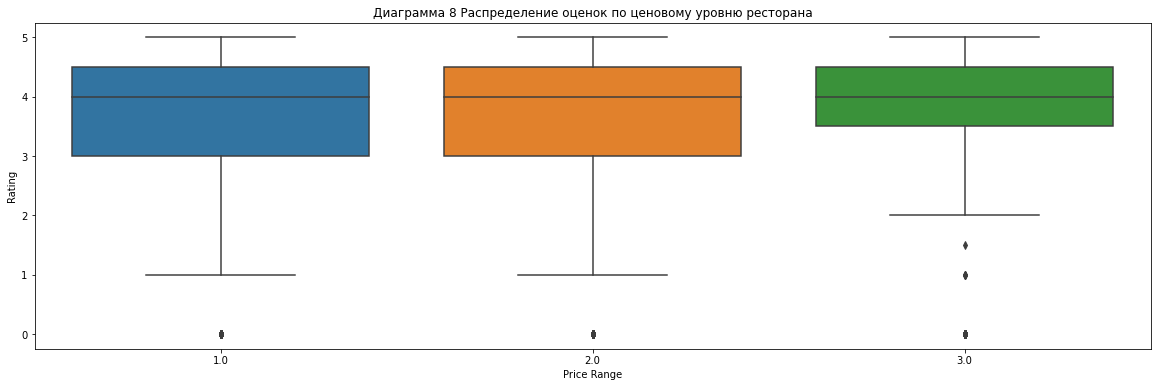

In [381]:
price_dict = {'$': 1,
              '$$ - $$$': 2,
              '$$$$': 3}


data['Price Range'] = data['Price Range'].map(price_dict)
sns.boxplot(x='Price Range', y='Rating', data=data)
plt.title('Диаграмма 8 Распределение оценок по ценовому уровню ресторана')

Дорогие рестораны получают меньше всего низких оценок


In [382]:
# Так как 70% составлет значение признака ['Price Range'] - '$$ - $$$' 
# То заполняем пропуски '$$ - $$$'
data['Price Range'].fillna('$$ - $$$', inplace=True)

6. Reviews

2 пропуска и 8112 пустых значений. Содержит тексты двух последних отзывов и даты этих отзывов. Формат данных - строка

In [383]:
data.Reviews[1:10] # имеются даты отзывов, пустые значения

1    [['Very good reviews!', 'Fine dining in Hakani...
2    [['Better than the Links', 'Ivy Black'], ['12/...
3    [['Most exquisite', 'Delicious and authentic']...
4    [['Always the best in bratislava', 'Very good ...
5    [['Lunch Break', 'Good to Quick Bite'], ['09/0...
6                                             [[], []]
7                                             [[], []]
8    [['Big group supper', 'Good food but very slow...
9    [['Good food', 'Good pizza'], ['12/02/2017', '...
Name: Reviews, dtype: object

In [384]:
data.Reviews = data.Reviews.fillna('[[], []]')

In [385]:
# сохраним пустые значения
data['Missing Reviews'] = data['Reviews'].apply(lambda x: 1 if x == '[[], []]' else 0)

Важно проанализировать даты отзывов, Максимальная разница количества дней между коментариями будет говорит о том, что отзывы практически не оставляют

In [386]:
#  проверим во всех ли строчках содержатся по два значения
data['Review Date'] = data['Reviews'].str.findall(r'\d+/\d+/\d+').to_list()

In [387]:
data['Num of Dates'] = data['Review Date'].apply(lambda x: len(x))


In [388]:
data['Num of Dates'].value_counts()

2    36202
0     8114
1     5680
3        4
Name: Num of Dates, dtype: int64

In [389]:
data[data['Num of Dates'] == 3][['Review Date','Reviews']]

,Review Date,Reviews
2221,"[21/10/17, 12/22/2017, 10/19/2017]","[['We visited 21/10/17', 'Best Kebab in London..."
3809,"[30/5/2017, 04/13/2017, 05/30/2017]","[['Good Museum Cafeteria', 'Lunch 30/5/2017'],..."
19254,"[3/1/2017, 06/02/2017, 01/03/2017]","[['The desserts arcade !', 'Visit today 3/1/20..."
33348,"[29/9/2016, 09/30/2016, 08/25/2016]","[['lunch 29/9/2016', 'Unplanned Great Dinner']..."


In [390]:
# Создаем отдельный признак с датами формата datetime
data['Review Date DT'] = data['Review Date'].apply(lambda x: pd.to_datetime(x))
data[data['Num of Dates'] == 3][['Review Date','Reviews']]

,Review Date,Reviews
2221,"[21/10/17, 12/22/2017, 10/19/2017]","[['We visited 21/10/17', 'Best Kebab in London..."
3809,"[30/5/2017, 04/13/2017, 05/30/2017]","[['Good Museum Cafeteria', 'Lunch 30/5/2017'],..."
19254,"[3/1/2017, 06/02/2017, 01/03/2017]","[['The desserts arcade !', 'Visit today 3/1/20..."
33348,"[29/9/2016, 09/30/2016, 08/25/2016]","[['lunch 29/9/2016', 'Unplanned Great Dinner']..."


In [391]:
# Задаем текущую дату
current_date = pd.datetime.now()

C:\Users\user\AppData\Local\Temp/ipykernel_12060/2576881861.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  current_date = pd.datetime.now()


In [392]:
# Создадим колонки с датой первого и последнего отзыва
# Если дата одна, будем считать, что это дата и первого, и последнего отзыва
data['First Review Date'] = data['Review Date DT'].apply(lambda x: x.min())
data['Last Review Date'] = data['Review Date DT'].apply(lambda x: x.max())

In [393]:
# Создадим числовые колонки на основе признаков со временем
# Количество дней после последнего и первого отзыва, временной промежуток между отзывами в днях
data['Days from Last Review'] = (current_date - data['Last Review Date']).dt.days 
data['Days from First Review'] = (current_date - data['First Review Date']).dt.days
data['Days between Reviews'] = data['Days from Last Review'] - data['Days from First Review']

In [394]:
# Удалим ненужные переменные
data.drop(['Review Date', 'Review Date DT', 'First Review Date', 'Last Review Date', 'Num of Dates'], axis = 1, inplace=True)
data.drop(['Reviews'], axis = 1, inplace=True)


7. ID_TA

Идентификатор ресторана на сайте Tripadvisor. Никакой дополнительной информации не несет. Можно смело удалять.

In [395]:
# 
# data.drop(['ID_TA'], axis = 1, inplace=True)

8. Numbers of Reviews

In [396]:
# сохраняем инфу о пропусках
data['Miss_num_r'] = pd.isna(data['Number of Reviews']).astype('uint8')
# смотрим распределение по количеству отзывов
data['Number of Reviews'].value_counts(normalize=True)

2.0       0.051346
3.0       0.043632
4.0       0.036474
5.0       0.031432
6.0       0.026880
            ...   
2366.0    0.000021
1757.0    0.000021
4996.0    0.000021
2236.0    0.000021
2297.0    0.000021
Name: Number of Reviews, Length: 1573, dtype: float64

In [397]:
data['Miss_num_r'].value_counts(normalize=True)

0    0.936
1    0.064
Name: Miss_num_r, dtype: float64

Порядка 5% всех отзывов - имеют 2 отзыва, можно ли сказать, какая будет медиана? ключевой вопрос каким значением заполнять пропуски, их немного - 6%, но отсутствие отзывов серьезный фактор при выборе ресторана

In [398]:
med = data['Number of Reviews'].median()
mod = data['Number of Reviews'].mode()
print(r'Медиана',med)
print(r'Мода',mod)

Медиана 33.0
Мода 0    2.0
dtype: float64


Text(0.5, 1.0, 'Диаграмма 9 Распределение количества отзывов')

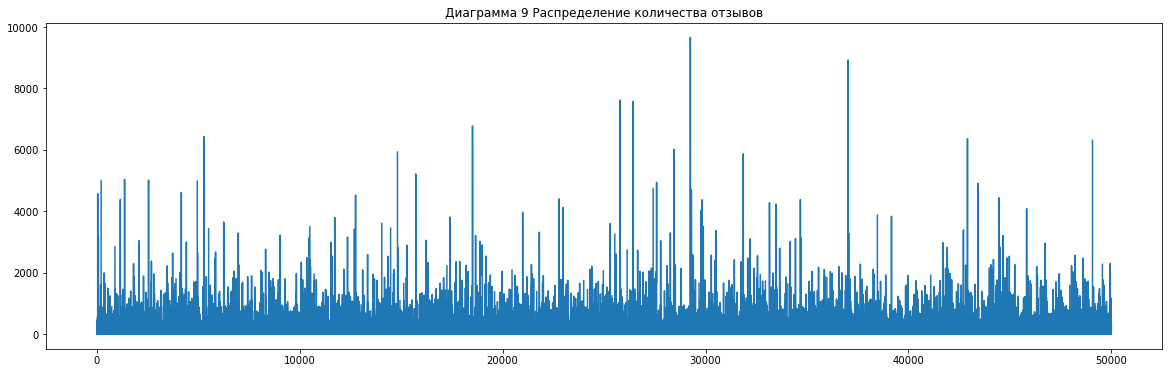

In [399]:
data['Number of Reviews'].plot()
plt.title("Диаграмма 9 Распределение количества отзывов")


Количество отзывов по некоторым ресторанам допольно большое, либо это проходимость у них, либо накручены

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Диаграмма 10 Распределение количества отзывов/outliners')

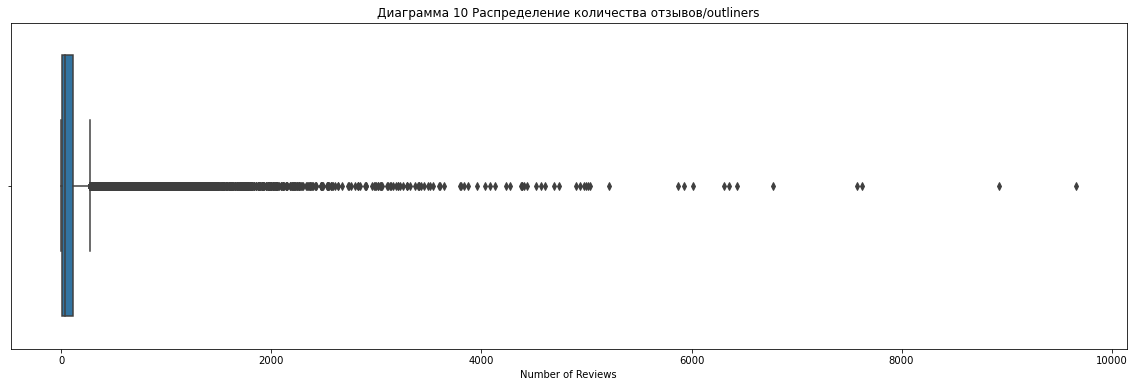

In [400]:
sns.boxplot(data['Number of Reviews'])
plt.title("Диаграмма 10 Распределение количества отзывов/outliners")

Посмотрим, сколько отзывов оставляли пустыми, если ресторан понравился посетители могут написать отзыв, но если не понравился, уж точно опишут его

In [401]:
data[['Number of Reviews', 'Missing Reviews']].head(10)

,Number of Reviews,Missing Reviews
0,4.0,1
1,97.0,0
2,28.0,0
3,202.0,0
4,162.0,0
5,24.0,0
6,2.0,1
7,NaN,1
8,2.0,0
9,13.0,0


Любопытно, может по каким-то особенным ресторанам есть очень много пустых отзывов? пустые отзывы проще всего написать, для раскрутки ресторана, так как пользователь ориентируется на количество и средний рейтинг

In [402]:
data[['Number of Reviews', 'Missing Reviews', 'Restaurant_id', 'chain']].sort_values(by='Number of Reviews', ascending=False)

,Number of Reviews,Missing Reviews,Restaurant_id,chain
29251,9660.0,0,id_375,1.0
37027,8927.0,0,id_64,1.0
25779,7622.0,0,id_430,1.0
26433,7575.0,0,id_12,1.0
18516,6777.0,0,id_266,1.0
...,...,...,...,...
49965,NaN,1,id_5720,1.0
49972,NaN,0,id_2009,1.0
49986,NaN,1,id_7274,1.0
49988,NaN,1,id_4968,1.0


In [403]:
data[['Missing Reviews', 'Restaurant_id']].value_counts(normalize=True)

Missing Reviews  Restaurant_id
0                id_227           0.00038
                 id_633           0.00036
                 id_436           0.00036
                 id_71            0.00036
                 id_344           0.00036
                                   ...   
                 id_8665          0.00002
                 id_8667          0.00002
                 id_8668          0.00002
                 id_11416         0.00002
1                id_9998          0.00002
Length: 18267, dtype: float64

Для ML заполним пустые значения медианой, потом можно попробывать заполнить модой или нулями, отсутствие отзывов говорит об многом

In [404]:
data['Number of Reviews'].fillna(med, inplace = True)
data['Number of Reviews'].value_counts()

33.0      3514
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
2366.0       1
1757.0       1
4996.0       1
2236.0       1
2297.0       1
Name: Number of Reviews, Length: 1573, dtype: int64

<AxesSubplot:xlabel='City'>

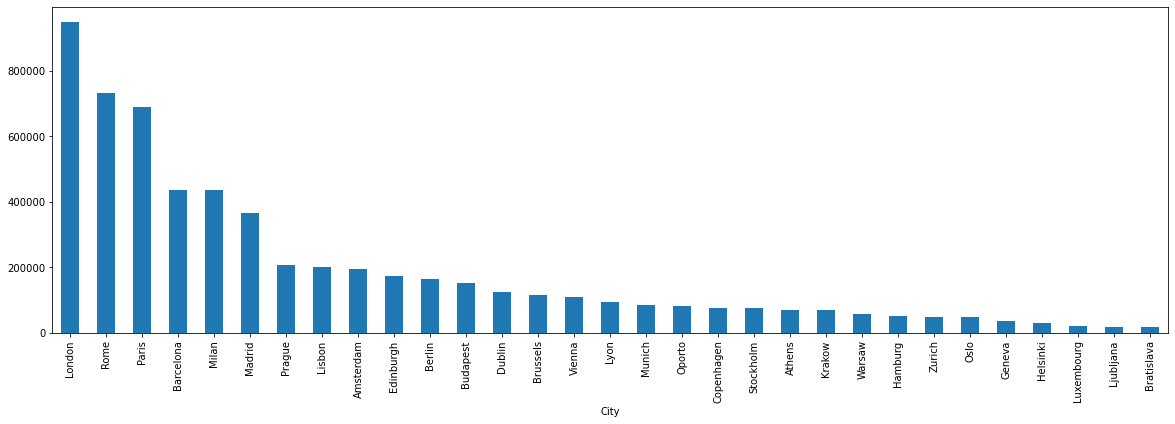

In [405]:
#Создадим словарь количество отзывов по городам и подставим в датасет

data.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar')

In [406]:
rewiews_city_dict = dict(data.groupby('City')['Number of Reviews'].sum())
data['num_rewiews_city'] = data.City.map(rewiews_city_dict)
data['relative_rank_reviews'] = data['Ranking'] / data['num_rewiews_city']

8. URL_TA
Ссылка на страницу ресторана на 'www.tripadvisor.com'

Можно вытащить название региона, города и ресторана, идентификатор ресторана. У нас уже есть несколько колонок с этой информацией. Этот столбец может понадобиться, если надо будет собрать дополнительную информацию с сайта Tripadvisor. Пока что я предлагаю этот столбец удалить.

In [407]:
data.drop(['URL_TA'], axis = 1, inplace=True)

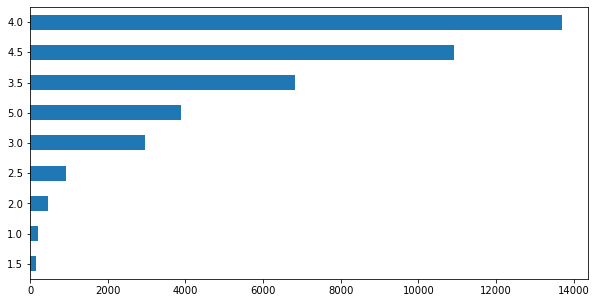

In [408]:
# распределение целевой переменной
plt.figure(figsize=(10, 5))
df_train['Rating'].value_counts(ascending=True).plot(kind='barh');

<Figure size 720x360 with 0 Axes>

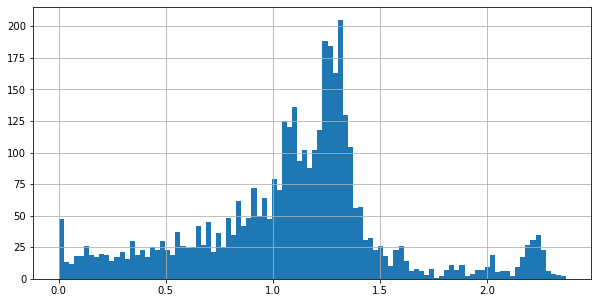

In [409]:
# Посмотрим распределение целевой переменной относительно признака ranking_norm
plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
data['Relative Ranking'][data['Rating'] == 5].hist(bins=100);

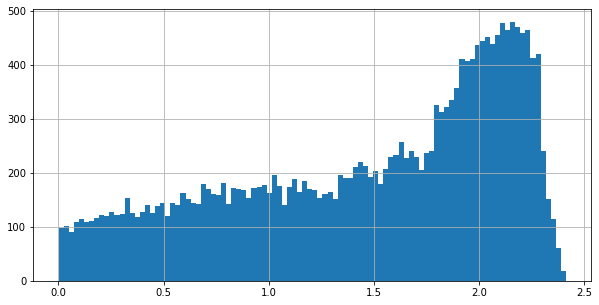

In [410]:
plt.figure(figsize=(10, 5))
data['Relative Ranking'][data['Rating'] < 4].hist(bins=100);

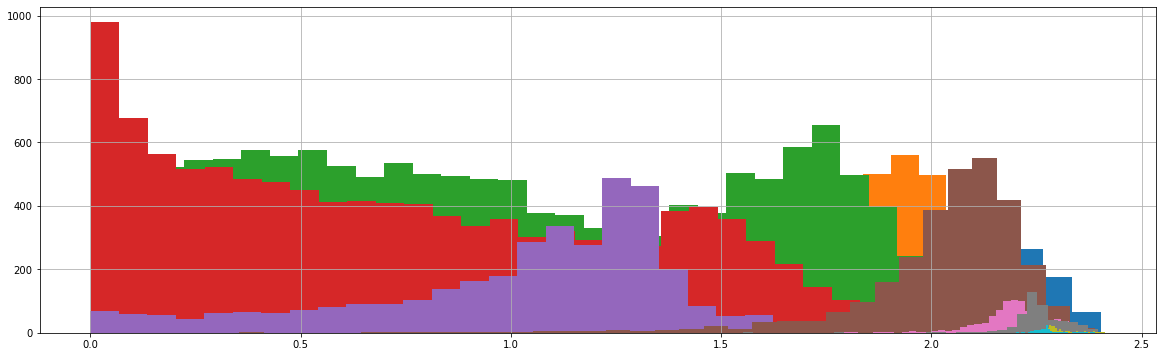

In [411]:
for x in data.Rating.unique():
    data['Relative Ranking'][data['Rating'] == x].hist(bins=35)


# Готовим моделья для машинного обучения

In [412]:
# создадим dummy - переменные
# 1 для городов 2 для кухонь
data = pd.get_dummies(data, columns=['City'], dummy_na=True)
cuisine_style_dummy = data['Cuisine Style List'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data = pd.merge(data, cuisine_style_dummy, left_index=True, right_index=True, how='left')


In [413]:
data = data.select_dtypes(exclude='O').drop(['Int_res_id','Missing Reviews', 'Miss_num_r', 'Missing Price Range', 'Days from First Review','Days from Last Review', 'Days between Reviews'], axis=1)


In [414]:
data.head()

,Ranking,Number of Reviews,sample,Rating,chain,main_rest_in_city,Cuisine Style_Nan,Relative Ranking,num_rewiews_city,relative_rank_reviews,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
0,12963.0,4.0,0,0.0,1.0,6108,0,2.122299,690430.0,0.018775,...,0,0,0,0,0,0,0,0,0,0
1,106.0,97.0,0,0.0,1.0,475,0,0.223158,30435.0,0.003483,...,0,0,0,0,0,0,0,0,0,0
2,810.0,28.0,0,0.0,1.0,745,0,1.087248,172796.0,0.004688,...,0,0,0,0,0,0,0,0,0,0
3,1669.0,202.0,0,0.0,1.0,7193,0,0.232031,947795.0,0.001761,...,0,0,0,0,0,0,0,0,0,0
4,37.0,162.0,0,0.0,1.0,380,0,0.097368,18553.0,0.001994,...,0,0,0,0,0,0,0,0,0,0


In [415]:
data.isna().sum()

Ranking              0
Number of Reviews    0
sample               0
Rating               0
chain                0
                    ..
Salvadoran           0
Xinjiang             0
Burmese              0
Fujian               0
Latvian              0
Length: 168, dtype: int64

In [416]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [417]:
from sklearn.model_selection import train_test_split

In [418]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [419]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 167), (40000, 167), (40000, 166), (32000, 166), (8000, 166))

# Обучаем, проверяем, оптимизируем

In [420]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [421]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [422]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [423]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
def rating(prediction): # добавление функции улучшает MAE с 0,206 до 0,179
        if prediction < 0.25:
            return 0
        elif 0.25 < prediction <= 0.75:
            return 0.5
        elif 0.75 < prediction <= 1.25:
            return 1
        elif 1.25 <prediction <= 1.75:
            return 1.5
        elif 1.75 < prediction <= 2.25:
            return 2
        elif 2.25 < prediction <= 2.75:
            return 2.5
        elif 2.75 < prediction <= 3.25:
            return 3
        elif 3.25 < prediction <= 3.75:
            return 3.5
        elif 3.75 < prediction <= 4.25:
            return 4
        elif 4.25 < prediction <= 4.75:
            return 4.5
        else:
            return 5
        
for i in range(y_pred.size):
        y_pred[i]=rating(y_pred[i])

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


In [424]:
#Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.179


<AxesSubplot:>

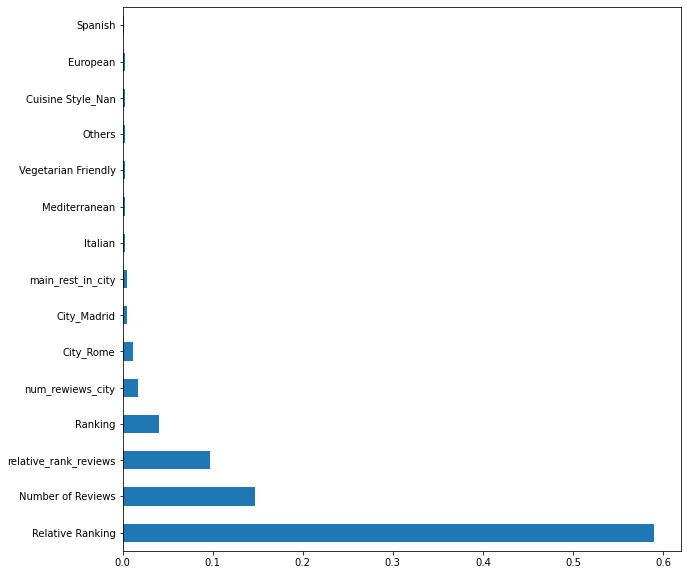

In [425]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Финализируем все и пишем код для работы информации из данного источника, по хорошему надо написать класс с функциями, но времени мало напишу пока просто функции